__Utilizar lo que hemos visto hasta ahora de Julia para:__

1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raíz.
 __(Tip: Si tienen un arreglo con todas las $x_k$'s que arrojó el método, digamos _list_, prueben hacer directamente $(list-S)/S$ )__.
    * Hacer lo mismo usando el método de bisección para $p_k$.
    
2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones __(Noten que aqui solo nos interesa la última iteración!, como lo hicieron en los primeros ejercicios)__:
    * Que tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser `metodo_newton(f,df,x0)`. El _output_ debe ser alguna raíz.
    * Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un rango amplio de condiciones iniciales, por ejemplo costruido con `linspace`. Es muy probable que funcione llamando la funcion que crearon como `metodo_newton.(f,df,x)`. Si no funciona la sintaxis creen una rutina solo para vectores, que seria lo previo al siguiente punto. El _ouput_ debe ser un arreglo donde las entradas son raices, no importa que estén repetidas. __Nota:__ Las funciones se pasan a la rutina SIN argumento, es decir solo como (por ej.) `metodo(f)`.
    * Crear la misma rutina, pero que esta vez solo reciba un rango amplio de condiciones iniciales (objetos `linspace`) y que revise el arreglo despues de $200$ iteraciones y solo tome las raices diferentes hasta cierto $\epsilon$. Aquí pueden usar `push!` para ir guardando las raíces en un vector inicializado como (por ej.) `t=[]`. El _output_ tiene que ser precisamente `t`. 
    * (__Lean bien este paso!__) Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los _inputs_ de la función del método sean solamente la función y la condición inicial.
        * Para esto deberán usar lo que aprendimos de SymPy y como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.
        * La función que reciba esta rutina debe ser de `Julia`, para la derivada pueden usar `SymPy` internamente, recuerden que es facil convertir funciones de `Julia` en funciones simbolicas evaluandolas en variables simbolicas; para regresarlas a funciones de `Julia` e iterarlas, consulten la parte donde vimos la función `lambdify`. 
        
__Nota:__ Se resolveran dudas de esta tarea el Martes 29, así que traten de avanzar para que surjan dudas.


**Parte 1**

In [35]:
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [36]:
using PyPlot

In [32]:
f(x)=x^3-x^2-x-1
derivada(x)=3x^2-2x-1

derivada (generic function with 1 method)

In [33]:

function raiz(inicial)
    list=zeros(30)
    x=inicial
    for i in 1:200
        x=x-(f(x)/derivada(x))
        list[i]=x;
    end
    return list
end

raiz (generic function with 1 method)

In [34]:
list1=raiz(0.1);
list2=raiz(2);
list3=raiz(-4);
list4=raiz(5);
listn = 1: length(list4)

LoadError: [91mBoundsError: attempt to access 30-element Array{Float64,1} at index [31][39m

In [30]:
#yscale("symlog", linthreshy=0.05)
plot(real(list1))
plot(real(list2))
plot(real(list3))
plot(real(list4))
PyPlot.scatter(listn,list4)
PyPlot.scatter(listn,list3)
PyPlot.scatter(listn,list2)
PyPlot.scatter(listn,list1)

xlabel("x")
ylabel("f(x)")
title("Convergencia de f(x) (a la raiz) dadas condiciones iniciales distintas")
grid("on")
show();



LoadError: [91mUndefVarError: list1 not defined[39m

Grafiquemos ahora el error relativo a la raiz, es decir:
$$\frac{x_k-S}{S}$$

In [218]:
List5=(list1+0.1)/0.1;
List6=(list2-2)/2;
List7=(list3+4)/-4;
List8=(list4-6)/5;

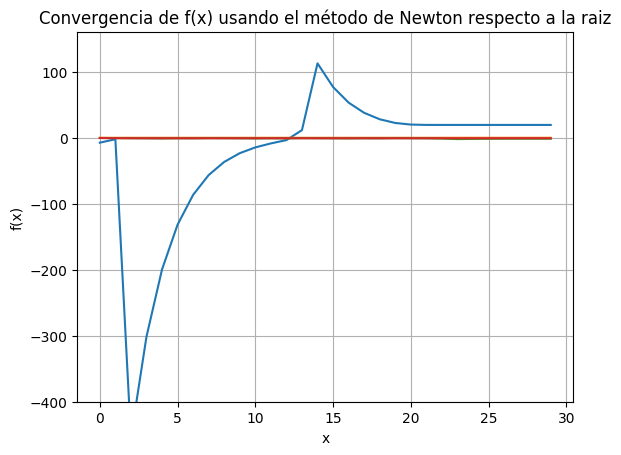

In [219]:
xlabel("x")
ylabel("f(x)")
title("Convergencia de f(x) usando el método de Newton respecto a la raiz")
grid("on")
plot(real(List5))
plot(real(List6))
plot(real(List7))
plot(real(List8))

ylim(-400,160);


Hagamos un zoom a donde converge cambiando el dominio de la gráfica en y usando $ylim(,)$

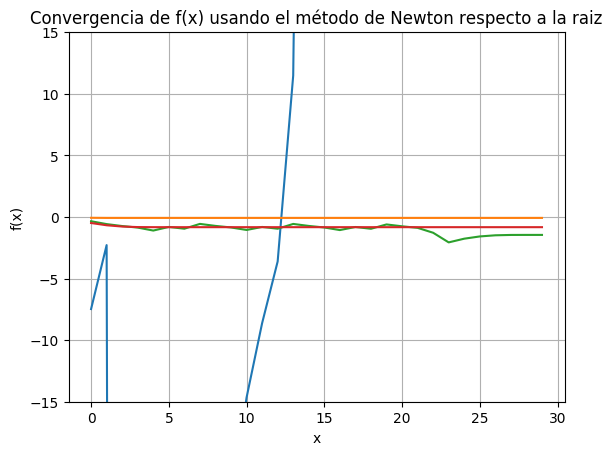

In [220]:
xlabel("x")
ylabel("f(x)")
title("Convergencia de f(x) usando el método de Newton respecto a la raiz")
grid("on")
plot(real(List5))
plot(real(List6))
plot(real(List7))
plot(real(List8))
ylim(-15,15)

show();

Hagamos MÁS ZOOM a donde converge cambiando el dominio de la gráfica en y usando $ylim(,)$

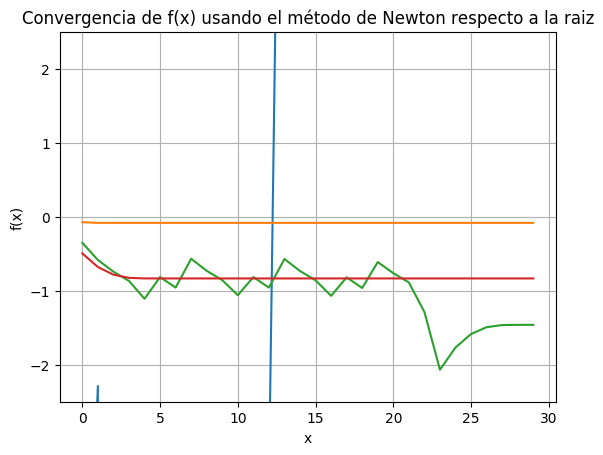

In [221]:
xlabel("x")
ylabel("f(x)")
title("Convergencia de f(x) usando el método de Newton respecto a la raiz")
grid("on")
plot(real(List5))
plot(real(List6))
plot(real(List7))
plot(real(List8))
ylim(-2.5,2.5)

show();

Par

Usemos ahora el método de ** La Bisección **

In [222]:
function bisec(a,b)
    p = (a+b)/2
    f(x) = x^3-x^2-x-1
    for i in 1:100
        if  f(a)*f(p) > 0
            a = p
        end
        
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
    end
    return p,f(p)
end;

Definamos los intervalos para cada condición inicial.

In [223]:
list9=biseccion(1.0, 2.0);
list10=biseccion(10.0, 20.0);
list11=biseccion(-30.0, 30.0);
list12=biseccion(-0.1, 0.1);

LoadError: [91mUndefVarError: biseccion not defined[39m

In [224]:
xlabel("p")
ylabel("f(p)")
title("Convergencia de las raíces por método de la bisección")
grid("on")
plot(list9)
plot(list10)
plot(list11)
plot(list12)

ylim(-100,400)

show();

LoadError: [91mUndefVarError: list9 not defined[39m

# Parte II Implementación del método de Newton para funciones arbitrarias

Añadamos la paquetería necesaria

In [225]:
Pkg.add("SymPy")

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [226]:
using SymPy;

In [227]:
Definamos la función como lo propuesto en clase

LoadError: [91msyntax: extra token "la" after end of expression[39m

In [228]:
function metodo(f,derivada,inicial)
      #x=Sym("x")
   
    
    list=zeros(Complex64,30);
    j=inicial;
    for i in 1:30
            #@show [j]
        j=j-f(j)/derivada(j);
        list[i]=j;
    end
    
    return j
end;
    
    

Veamos que funciona usando la ecuación propuesta en el ejercicio anterior para el método de Newton

In [229]:
f(x)=x^3-x^2-x-1
derivada(x)=3x^2-2x-1

derivada (generic function with 1 method)

In [230]:
metodo(f,derivada,10)

1.8392867552141612

In [231]:
f(ans) #Si es raiz

2.220446049250313e-16

Parte 2.2
**Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un rango amplio de condiciones iniciales, por ejemplo costruido con linspace. Es muy probable que funcione llamando la funcion que crearon como metodo_newton.(f,df,x). Si no funciona la sintaxis creen una rutina solo para vectores, que seria lo previo al siguiente punto. El ouput debe ser un arreglo donde las entradas son raices, no importa que estén repetidas. Nota: Las funciones se pasan a la rutina SIN argumento, es decir solo como (por ej.) metodo(f).**

In [232]:
function  metodo2(a,b) #Método,de,Newton
    x=a:b #Este es nuestro array (linspace)
    n=b-a
    out=zeros(n)
    for i in 1:n
        #@show  x[i]
    out[i]=metodo(f, derivada, x[i]) 
    end
return out
end

metodo2 (generic function with 1 method)

Evaluemos la función en el intervalo (a,b)

In [233]:
metodo2(3,20)

17-element Array{Float64,1}:
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

Se intentó un intervalo de (-5,5) pero, al ser raiz el valor 1.8392... la funcion raiz moría para la derivada (divergia) y teníamos elementos NaN (Not a Number) para elementos cerca de esa raiz 1,2 por ejemplo.

Parte 2.3 ** Crear la misma rutina, pero que esta vez solo reciba un rango amplio de condiciones iniciales (objetos linspace) y que revise el arreglo despues de 200 iteraciones y solo tome las raices diferentes hasta cierto ϵ. Aquí pueden usar push! para ir guardando las raíces en un vector inicializado como (por ej.) t=[]. El output tiene que ser precisamente t.  **

In [234]:
#Tomemos otra vez un intervalo (el linspace) definido por (a,b) y e=epsilon y definamos el metodo de newton por 3ra vez

In [254]:
function metodo3(a,b,e)
    #Definamos nuestro arreglo de elementos (dado el conjunto de enteros definidos por el intervalo a,b usando un vector)
    lista=metodo2(a,b)
    #Usando el comando "push!" descartaremos raíces repetidas en la rutina
    t=[]
    #push!(t,vector[1])
    for i in 1:length(lista)
        iteraciones=0
        for j in 1:length(t)
            if lista[i]>t[j]+e
                iteraciones=iteraciones+1
            end
            if lista[i]<iteraciones[j]-e
                iteraciones=iteraciones+1
            end
        end
        if iteraciones==length(t)
            push!(t,lista[i])
        end
    end
    return t
end

metodo3 (generic function with 1 method)

In [257]:
metodo3(5,2000,0.000000000000000000000001) #epsilon=e=10⁻(10)

1-element Array{Any,1}:
 1.83929

In [258]:
#Evaluemos ahora en funciones (No lo haré ahora pues hay poco tiempo y la computadora es prestada, tuve un accidente con el  display de la mia y la mandé a arreglar)

In [260]:
function g(x)
    return x²
end

g (generic function with 1 method)

In [261]:
function derivadag(x)
    return 2x
end

derivadag (generic function with 1 method)

In [ ]:
function metodo31(g,derivada)

In [40]:
#Seguimos con el siguiente programa usando SymPy